In [1]:
#!pip install oec
#Try: https://intl-atlas-downloads.s3.amazonaws.com/index.html

In [2]:
#Help docs for API
#!python -m pydoc oec

In [3]:
import pandas as pd; from pandas import DataFrame; import numpy as np; import seaborn as sns
import matplotlib.pyplot as plt; from scipy.interpolate import UnivariateSpline

import math ; from datetime import datetime ; plt.style.use('seaborn-whitegrid')
import statsmodels.api as sm ; from statsmodels.tsa.seasonal import seasonal_decompose

import oec 
%matplotlib inline

In [4]:
#API call source: https://pypi.org/project/oec/
# Set parameters to extract top exporters from the API documentation
syst = 'sitc'
code = '7849' #Enter product code here
name = 'Car parts'

params = {'classification': syst,
          'trade_flow': 'export',
          'year': 'all',
          'origin': 'all', #Set origin to all for comparison
          'destination': 'all',
          'product': code} #Set code for product of interest (https://unstats.un.org/unsd/publication/SeriesM/SeriesM_34rev4E.pdf)
            

# Load lists from the OEC package on countries, products and exports
list_of_countries = oec.get_countries()
list_of_products = oec.get_products(params['classification'])
list_of_exports = oec.get_trade(**params)

In [5]:
#Save the results in CSV file
saveas = 'sitc_'+code+'_'+name+'_exporters.csv'
oec.data_to_csv(list_of_exports,saveas)
topx = pd.read_csv(saveas)
topx['top_exporter'] = topx['top_exporter'].map(lambda x: str(x)[2:])
topx.rename(columns={'top_exporter': 'exporter'}, inplace=True)
topx.head(2)

,export_val,export_val_growth_pct,export_val_growth_pct_5,export_val_growth_val,export_val_growth_val_5,import_val,import_val_growth_pct,import_val_growth_pct_5,import_val_growth_val,import_val_growth_val_5,pci,pci_rank,pci_rank_delta,sitc_id,sitc_id_len,exporter,top_importer,year
0,16470000.0,NaN,NaN,NaN,NaN,8235000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107849,6.0,fra,sabra,1974.0
1,10628000.0,-0.354706,NaN,-11684000.0,NaN,5314000.0,-0.354706,NaN,-5842000.0,NaN,NaN,NaN,NaN,107849,6.0,swe,nacan,1975.0


In [6]:
columns=['exporter','export_val','year']
topx = topx[columns]
topx.head(2)

,exporter,export_val,year
0,fra,16470000.0,1974.0
1,swe,10628000.0,1975.0


In [7]:
topx.loc[topx['exporter']=='fdr', ['exporter']] = 'deu'

In [8]:
url = 'http://unstats.un.org/unsd/tradekb/Attachment440.aspx?AttachmentType=1'
countries = pd.read_excel(url)
countries.to_csv('country list.csv')
#countries = pd.read_excel('country list.csv')
countries.rename(columns={'ISO3-digit Alpha': 'exporter'}, inplace=True)
countries = countries.astype(str).apply(lambda x: x.str.lower())
countries.rename(columns=lambda x: x.replace('Country Name, Full', 'origin'), inplace=True)
countries.drop(['Country Comments','ISO2-digit Alpha','Country Code',"Country Name, Abbreviation",
                'Start Valid Year','End Valid Year'],axis=1,inplace=True)
countries.head()

,origin,exporter
0,afghanistan,afg
1,"africa cameu region, not elsewhere specified",nan
2,albania,alb
3,algeria,dza
4,american samoa,asm


In [9]:
countries.loc[countries['exporter']=='ddr', ['exporter']] = 'deu'
#countries.loc[countries['origin']=='former democratic republic of germany', ['origin']] = 'germany'

In [10]:
top_exporters = topx.merge(countries, on=['exporter'],how='left')
#top_exporters[top_exporters['year']==2015]
top_exporters.to_csv(code+'top_exporters.csv')

In [11]:
top_exporters= pd.read_csv(code+'top_exporters.csv')
top_exporters.index = top_exporters['year']
top_exporters.drop([
    'year',
    'Unnamed: 0'],axis=1,inplace=True)
top_exporters.head()

,exporter,export_val,origin
year,,,
1974.0,fra,16470000.0,"france, monaco"
1975.0,swe,10628000.0,sweden
1976.0,usa,179620000.0,"usa, puerto rico and us virgin islands"
1976.0,usa,179620000.0,usa and puerto rico
1977.0,fra,21705000.0,"france, monaco"


In [12]:
#top_exporters = np.array(top_exporters)
#print(top_exporters)

#Creating pandas dataframe from numpy array
#top_exporters = pd.DataFrame({'exporter': top_exporters[:]})
#top_exporters.head()

In [13]:
# Set parameters to extract all exporting countries for product of interest
params = {'classification': 'sitc',
          'trade_flow': 'export',
          'year': 'all',
          'origin': 'show', #Set to show to view all the origin data related to export product 
          'destination': 'all',
          'product': code}

list_of_countries = oec.get_countries()
list_of_products = oec.get_products(params['classification'])
list_of_exports = oec.get_trade(**params)

In [14]:
saveall = code+'_'+'all_exporters.csv'
oec.data_to_csv(list_of_exports, saveall )

In [15]:
exports =pd.read_csv(saveall)

In [16]:
exports['export_val'].replace('',0, inplace=True)
#exports['export_rca'].replace('', np.nan, inplace=True)
#exports.dropna(subset=['export_val','export_rca'], inplace=True)

In [17]:
billion = 1000000000
exports['export_val'] = exports['export_val']/billion
exports = exports[['year','origin_id','export_val','export_rca']]
exports['origin_id'] = exports['origin_id'].map(lambda x: str(x)[2:])
exports.rename(columns={'origin_id': 'exporter'}, inplace=True)
exports.head()

,year,exporter,export_val,export_rca
0,1974.0,deu,0.002941,1.667370
1,1974.0,esp,0.001599,10.849400
2,1974.0,fdr,0.002941,1.667370
3,1974.0,fra,0.006198,6.928290
4,1974.0,gbr,0.000254,0.329613


In [18]:
exports.loc[exports['exporter']=='fdr', ['exporter']] = 'deu'

In [19]:
exports = exports.merge(countries, on=['exporter'],how='left')

In [20]:
exports.index = exports['year']
exports.drop(['year'],axis=1,inplace=True)
exports.head()

,exporter,export_val,export_rca,origin
year,,,,
1974.0,deu,0.002941,1.66737,former democratic republic of germany
1974.0,deu,0.002941,1.66737,former federal republic of germany
1974.0,deu,0.002941,1.66737,germany
1974.0,esp,0.001599,10.84940,spain
1974.0,deu,0.002941,1.66737,former democratic republic of germany


In [21]:
#Make a list of unique instances of the exporting countries
top_exporters = np.sort((top_exporters['exporter']).unique())
top_exporters

array(['can', 'deu', 'fra', 'mex', 'swe', 'usa'], dtype=object)

In [22]:
#top_exporters

In [23]:
origin = np.sort(exports['exporter'].unique())
#origin

In [24]:
deu = exports['export_val'].loc[exports['exporter'] == 'deu']
can = exports['export_val'].loc[exports['exporter'] == 'can']
fra = exports['export_val'].loc[exports['exporter'] == 'fra']
swe = exports['export_val'].loc[exports['exporter'] == 'swe']
mex = exports['export_val'].loc[exports['exporter'] == 'mex']
usa = exports['export_val'].loc[exports['exporter'] == 'usa']
#jpn = exports['export_val'].loc[exports['exporter'] == 'jpn']

zar = exports['export_val'].loc[exports['exporter'] == 'zaf']

In [25]:
import os
dir_path = os.path.dirname(os.path.realpath('Exports_NNs'))

'C:\\Users\\16353\\Documents\\ThaW\\PhD\\time_series_trade'

In [26]:
target = dir_path+'\Exports_NNs'
deu.to_csv(target+'Germany'+'_'+code+'.csv',header='True')
can.to_csv(target+'Canada'+'_'+code+'.csv',header='True')
fra.to_csv(target+'France'+'_'+code+'.csv',header='True')
swe.to_csv(target+'Sweden'+'_'+code+'.csv',header='True')
mex.to_csv(target+'Mexico'+'_'+code+'.csv',header='True')
swe.to_csv(target+'Sweden'+'_'+code+'.csv',header='True')
usa.to_csv(target+'United States of America'+'_'+code+'.csv',header='True')

zar.to_csv(target+'South Africa'+'_'+code+'.csv',header='True')


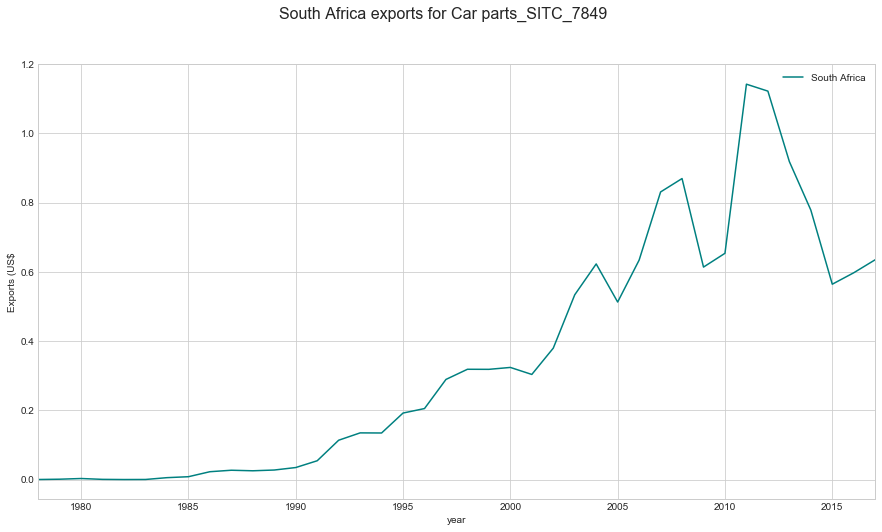

In [27]:
#compare = zar
fig1, ax1 = plt.subplots(figsize=(15,8))
label='South Africa'
zar.plot(color='teal',ax=ax1,label=label)
ax1.set_ylabel('Exports (US$')
fig1.suptitle("South Africa exports for "+name +'_' +'SITC_'+code, fontsize=16)

plt.legend(ncol=1,loc='best')
plt.savefig(str(label)+' '+code+' '+'_exports')

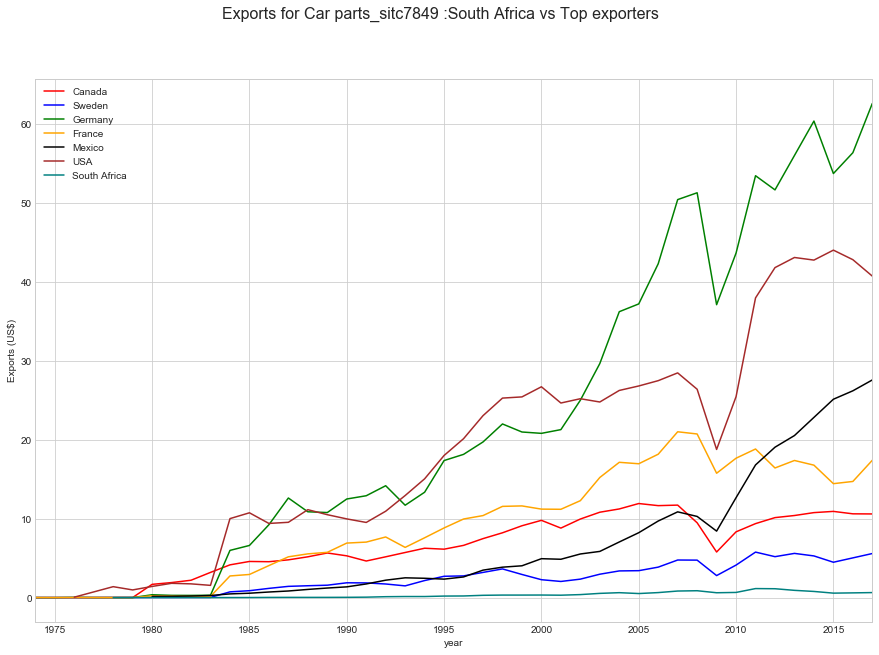

In [28]:
fig1, ax1 = plt.subplots(figsize=(15,10))

#top_exporters['export_val'].plot(color='red', ax=ax1,label='World trend')
can.plot(color='red',ax=ax1,label='Canada')
swe.plot(color='blue',ax=ax1,label='Sweden')
deu.plot(color='green',ax=ax1,label='Germany')
fra.plot(color='orange',ax=ax1,label='France')
mex.plot(color='black',ax=ax1,label='Mexico')
usa.plot(color='brown',ax=ax1,label='USA')
#jpn.plot(color='purple',ax=ax1,label='Japan')
zar.plot(color='teal',ax=ax1,label='South Africa')

ax1.set_ylabel('Exports (US$)')
fig1.suptitle("Exports for "+name+'_'+syst+code+" :South Africa vs Top exporters", fontsize=16)

plt.legend(ncol=1,loc='best')
plt.savefig('SA vs Top exporters')